<a href="https://colab.research.google.com/github/chirag20019/ML_Programs/blob/main/Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

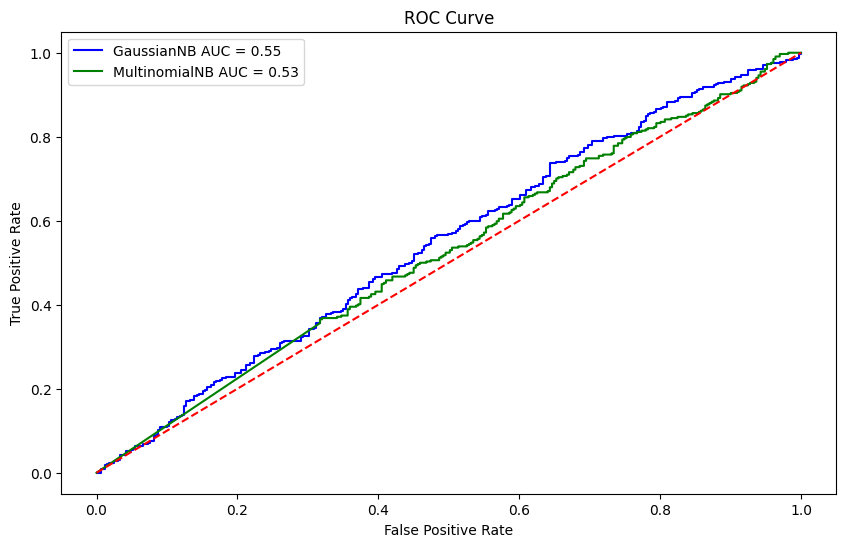

GaussianNB Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.74      0.61       331
           1       0.54      0.31      0.40       334

    accuracy                           0.52       665
   macro avg       0.53      0.52      0.50       665
weighted avg       0.53      0.52      0.50       665

MultinomialNB Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.60      0.55       331
           1       0.53      0.45      0.48       334

    accuracy                           0.52       665
   macro avg       0.52      0.52      0.52       665
weighted avg       0.52      0.52      0.52       665



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Load Dataset
data = pd.read_csv('/content/Adaniports.csv')

# Step 1: EDA
# Check for missing values and data types
print(data.info())

# Check statistical summary
print(data.describe())

# Step 2: Data Preprocessing
# Verify necessary columns exist
required_columns = ['Open', 'High', 'Low', 'Volume', 'Close', 'Prev Close']
for col in required_columns:
    if col not in data.columns:
        raise ValueError(f"Missing required column: {col}")

# Add target column
data['Target'] = np.where(data['Close'] > data['Prev Close'], 1, 0)  # 1 if price increased, else 0

# Select features and target
features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Target']

# Handle missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Naive Bayes Classifiers
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

# Step 4: Accuracy Score
acc_gnb = accuracy_score(y_test, y_pred_gnb)
acc_mnb = accuracy_score(y_test, y_pred_mnb)
print("GaussianNB Accuracy:", acc_gnb)
print("MultinomialNB Accuracy:", acc_mnb)

# Step 5: Confusion Matrix with Cross-Validation
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)
print("Confusion Matrix - GaussianNB:\n", conf_matrix_gnb)
print("Confusion Matrix - MultinomialNB:\n", conf_matrix_mnb)

# Cross-Validation Scores
cv_scores_gnb = cross_val_score(gnb, X, y, cv=5)
cv_scores_mnb = cross_val_score(mnb, X, y, cv=5)
print("Cross-validation scores - GaussianNB:", cv_scores_gnb)
print("Cross-validation scores - MultinomialNB:", cv_scores_mnb)
# Step 6: ROC and AUC
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, gnb.predict_proba(X_test)[:, 1])
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, mnb.predict_proba(X_test)[:, 1])

roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
roc_auc_mnb = auc(fpr_mnb, tpr_mnb)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_gnb, tpr_gnb, color='blue', label=f'GaussianNB AUC = {roc_auc_gnb:.2f}')
plt.plot(fpr_mnb, tpr_mnb, color='green', label=f'MultinomialNB AUC = {roc_auc_mnb:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Step 7: Interpretation
print("GaussianNB Classification Report:\n", classification_report(y_test, y_pred_gnb))
print("MultinomialNB Classification Report:\n", classification_report(y_test, y_pred_mnb))
